In [ ]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing data
#read_csv function is used to read csv file
# data=pd.read_csv(r'C:\Users\voicezen\OneDrive\DataScienceTraining\Datasets\Visualization\Titanic_data.csv')
data = sns.load_dataset('titanic')

In [ ]:
#head function is used to print the first five records
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#tail function is used to print the last five records
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### Let's start with data analysis and pre processing

In [ ]:
#shape checks the rows and columns of the data , we have 891 rows and 12 columns in our dataset
data.shape

(891, 15)

In [ ]:
#dtypes check the data types of our features
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
#here we are checking the total null values in our features
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
data.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

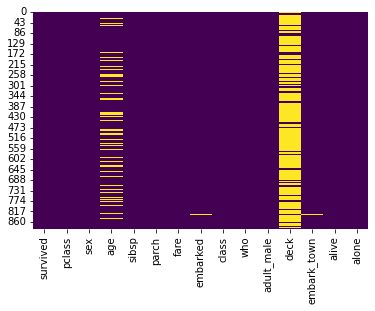

In [ ]:
#visualizing the null values in the dataset
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [36]:
#finding the percentage of null values
print('Age :',data.age	.isnull().sum()/len(data)*100)
# print('Cabin:',data.cabin.isnull().sum()/len(data)*100)
print('Embarked:',data.embarked.isnull().sum()/len(data)*100)
# print('boat :',data.boat.isnull().sum()/len(data)*100)
# print('body :',data.body.isnull().sum()/len(data)*100)
# print('Home Dest :',data['home.dest'].isnull().sum()/len(data)*100)

Age : 19.865319865319865
Embarked: 0.22446689113355783


## Missing value imputation

C:\Users\Renuka\Desktop\jupiter_lab\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

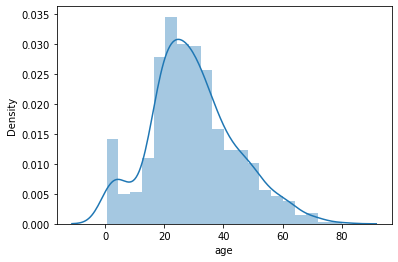

In [37]:
#let's check the distribution of Age feature
sns.distplot(data['age'],hist=True)

In [38]:
data['age'].mean()

29.69911764705882

In [39]:
#Age feature is not highly skewed so we will impute missing values with mean

data['Age_mean']=data['age'].fillna(data['age'].mean())

In [40]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


In [42]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'Age_mean'],
      dtype='object')

## Dropping the unnecessary features

In [73]:
#dropping Age variable from the data as our new age after imputation is Age_mean
#data.drop('Age',axis=1,inplace=True)
data= data.drop(['deck','alive','who'],axis=1)

In [74]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone,Age_mean
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,True,35.0


## Treating outliers

- We can either drop or treat the outliers. We will be discussing both techniques here .

In [ ]:
#making the copy of data to showcase how to drop outlier values
df=data.copy()

In [ ]:
#outliers in Age
sns.boxplot(y = df.Age_mean)

#### Removing outliers

#### Treating outliers

In [72]:
IQR=data['Age_mean'].quantile(0.75)-data['Age_mean'].quantile(0.25)

In [70]:
#statistical way
lower_bridge=data['Age_mean'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Age_mean'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-12.6344
69.6344


In [71]:
lower_bridge=data['Age_mean'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Age_mean'].quantile(0.95)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-12.6344
88.6344


In [68]:
#business intuition
# for floor, use 5th percentile
# for cap, use 99th percentile

floor1 = data['Age_mean'].quantile(0.05)
cap1 = data['Age_mean'].quantile(0.99)

print(floor1)
print(cap1)

6.0
65.0


<AxesSubplot:ylabel='fare'>

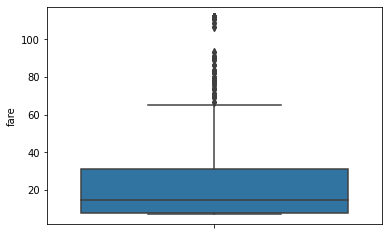

In [66]:
sns.boxplot(y = data.fare)

In [65]:
#statistical way for fare
IQR=data['fare'].quantile(0.75)-data['fare'].quantile(0.25)

lower_bridge=data['fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [64]:
#statistical way for fare
IQR=data['fare'].quantile(0.75)-data['fare'].quantile(0.25)

lower_bridge=data['fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['fare'].quantile(0.95)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
146.07605


In [63]:
data['fare'].min()

7.0

In [ ]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
data[data['fare']==0].shape

(0, 16)

In [61]:
data[data['fare']==0].describe()

,survived,pclass,age,sibsp,parch,fare,Age_mean
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
data[data['fare']>=146.71355].count()/data.shape[0]

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
deck           0.0
embark_town    0.0
alive          0.0
alone          0.0
Age_mean       0.0
dtype: float64

In [60]:
data = data[data['fare']<=146.71355]

In [44]:
#business intuition for fare
# for floor, use 5th percentile
# for cap, use 95th percentile

floor1 = data['fare'].quantile(0.05)
cap1 = data['fare'].quantile(0.95)

print(floor1)
print(cap1)

7.225
112.07915


In [45]:
data.loc[data['fare']>112, 'fare'] = 112
data.loc[data['fare']<7,'fare'] =7

# Data Analysis

In [46]:
data.describe()

,survived,pclass,age,sibsp,parch,fare,Age_mean
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,27.844000,29.699118
std,0.486592,0.836071,14.526497,1.102743,0.806057,29.108122,13.002015
min,0.000000,1.000000,0.420000,0.000000,0.000000,7.000000,0.420000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,112.000000,80.000000


In [ ]:
#to include categorical variable also
data.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data.groupby('sex')['survived'].count()

sex
female    314
male      577
Name: survived, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

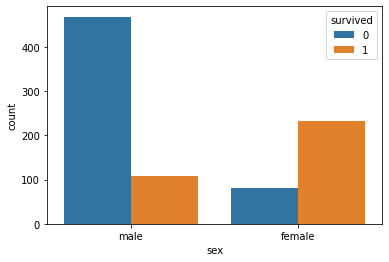

In [48]:
sns.countplot(x='sex',data=data,hue='survived')

In [49]:
data.groupby(['sex','embarked'])['survived'].count()

sex     embarked
female  C            73
        Q            36
        S           203
male    C            95
        Q            41
        S           441
Name: survived, dtype: int64

In [ ]:
data.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

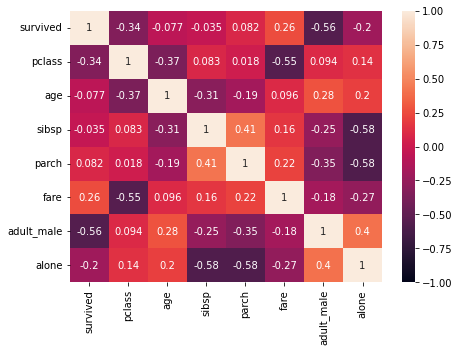

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot=True,vmin=-1)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

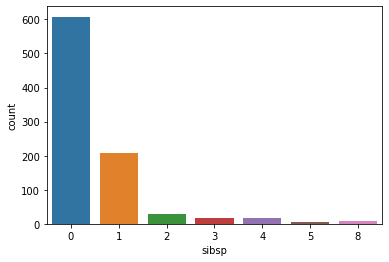

In [50]:
sns.countplot('sibsp',data=data)

<AxesSubplot:xlabel='parch', ylabel='count'>

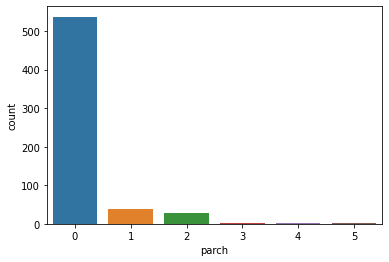

In [54]:

sns.countplot('parch',data=data[data['sibsp']==0])

C:\Users\Renuka\Desktop\jupiter_lab\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

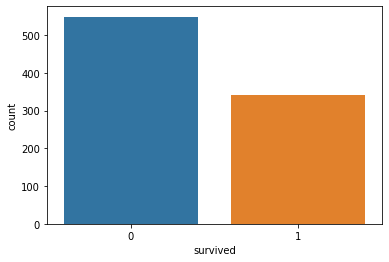

In [55]:
#distribution of classes in dependent variable
sns.countplot('survived',data=data)

<AxesSubplot:xlabel='survived', ylabel='count'>

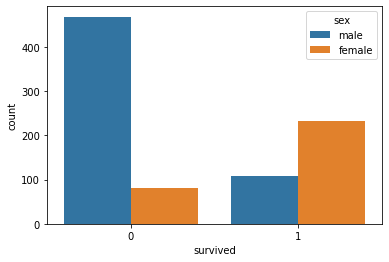

In [57]:
sns.countplot('survived',data=data,hue='sex')

C:\Users\Renuka\Desktop\jupiter_lab\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

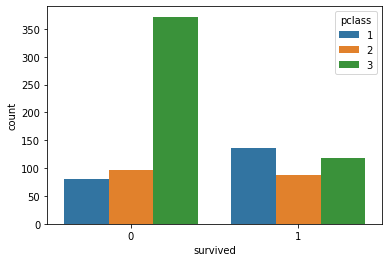

In [58]:
#people with p class 3 has more chances of non survival than others

sns.countplot('survived',data=data,hue='pclass')